<a href="https://colab.research.google.com/github/Francisco2963/XGBOOST-Clasificaci-n_utilizando_XGBoost/blob/main/Clasificaci%C3%B3n_utilizando_XGBoost_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
df = pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [323]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [325]:
df.duplicated().sum()

0

In [326]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


id(Identificación única para cada paciente)

age(Edad del paciente en años)

origin(lugar de estudio)

sex(Masculino/Femenino)

cpTipo de dolor torácico ([angina típica, angina atípica, no anginosa, asintomática])

trestbpsPresión arterial en reposo (presión arterial en reposo (en mm Hg al ingreso al hospital))

chol(colesterol sérico en mg/dl)

fbs(si el nivel de azúcar en sangre en ayunas es > 120 mg/dl)

restecg (resultados electrocardiográficos en reposo)
-- Valores: [normal, anomalía de la presión arterial sistólica, hipertrofia del ventrículo izquierdo]

thalach: frecuencia cardíaca máxima alcanzada

exang:angina inducida por el ejercicio (Verdadero/Falso)

oldpeak:Depresión del segmento ST inducida por el ejercicio en relación con el reposo

slope:la pendiente del segmento ST del ejercicio máximo

ca: número de vasos principales (0-3) coloreados mediante fluoroscopia

thal: [normal; defecto fijo; defecto reversible]

num:el atributo predicho

In [327]:
df['num'].unique()  # variable objetivo

array([0, 2, 1, 3, 4])

In [328]:
df['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [329]:
df_angina_tipica = df[df['cp'] == 'typical angina']
df_angina_tipica.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
20,21,64,Male,Cleveland,typical angina,110.0,211.0,False,lv hypertrophy,144.0,True,1.8,flat,0.0,normal,0
21,22,58,Female,Cleveland,typical angina,150.0,283.0,True,lv hypertrophy,162.0,False,1.0,upsloping,0.0,normal,0
27,28,66,Female,Cleveland,typical angina,150.0,226.0,False,normal,114.0,False,2.6,downsloping,0.0,normal,0
30,31,69,Female,Cleveland,typical angina,140.0,239.0,False,normal,151.0,False,1.8,upsloping,2.0,normal,0


In [330]:
df['trestbps'].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.,  98., 190.,  nan, 113.,  92.,
        95.,  80., 185., 116.,   0.,  96., 127.])

In [331]:
df['chol'].unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 223., 160., 394., 184., 315., 409., 244., 195.,
       196., 126., 313., 259., 200., 262., 215., 228., 193., 271., 210.,
       327., 149., 295., 306., 178., 237., 218., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [332]:
df['fbs'].unique()

array([True, False, nan], dtype=object)

In [333]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [334]:
df['thalch'].unique()

array([150., 108., 129., 187., 172., 178., 160., 163., 147., 155., 148.,
       153., 142., 173., 162., 174., 168., 139., 171., 144., 132., 158.,
       114., 151., 161., 179., 120., 112., 137., 157., 169., 165., 123.,
       128., 152., 140., 188., 109., 125., 131., 170., 113.,  99., 177.,
       141., 180., 111., 143., 182., 156., 115., 149., 145., 146., 175.,
       186., 185., 159., 130., 190., 136.,  97., 127., 154., 133., 126.,
       202., 103., 166., 164., 184., 124., 122.,  96., 138.,  88., 105.,
       194., 195., 106., 167.,  95., 192., 117., 121., 116.,  71., 118.,
       181., 134.,  90.,  98., 176., 135., 110.,  nan, 100.,  87., 102.,
        92.,  91.,  82., 119.,  94., 104.,  60.,  83.,  63.,  70.,  77.,
        72.,  78.,  86.,  93.,  67.,  84.,  80., 107.,  69.,  73.])

In [335]:
df['exang'].unique()

array([False, True, nan], dtype=object)

In [336]:
df['oldpeak'].unique()

array([ 2.3,  1.5,  2.6,  3.5,  1.4,  0.8,  3.6,  0.6,  3.1,  0.4,  1.3,
        0. ,  0.5,  1.6,  1. ,  1.2,  0.2,  1.8,  3.2,  2.4,  2. ,  2.5,
        2.2,  2.8,  3. ,  3.4,  6.2,  4. ,  5.6,  2.9,  0.1,  2.1,  1.9,
        4.2,  0.9,  1.1,  3.8,  0.7,  0.3,  4.4,  5. ,  nan, -1.1, -1.5,
       -0.1, -2.6, -0.7, -2. , -1. ,  1.7, -0.8, -0.5, -0.9,  3.7])

In [337]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping', nan], dtype=object)

In [338]:
df['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [339]:
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect', nan], dtype=object)

In [340]:
df[df['trestbps'].isnull()]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
393,394,48,Female,Hungary,atypical angina,NaN,308.0,False,st-t abnormality,NaN,NaN,2.0,upsloping,NaN,NaN,0
599,600,35,Male,Switzerland,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
714,715,69,Male,Switzerland,asymptomatic,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,reversable defect,3
733,734,63,Male,VA Long Beach,non-anginal,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1
743,744,74,Male,VA Long Beach,non-anginal,NaN,0.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,0
746,747,51,Male,VA Long Beach,asymptomatic,NaN,0.0,True,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,2
749,750,55,Male,VA Long Beach,non-anginal,NaN,228.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
750,751,54,Male,VA Long Beach,asymptomatic,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
756,757,60,Male,VA Long Beach,asymptomatic,NaN,281.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,2
758,759,58,Male,VA Long Beach,asymptomatic,NaN,203.0,True,normal,NaN,NaN,NaN,NaN,NaN,NaN,1


In [341]:
Total_perdidos = df.iloc[775:782]
Total_perdidos

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
775,776,68,Male,VA Long Beach,asymptomatic,138.0,0.0,False,normal,130.0,True,3.0,flat,NaN,NaN,2
776,777,53,Male,VA Long Beach,asymptomatic,154.0,0.0,NaN,st-t abnormality,140.0,True,1.5,flat,NaN,NaN,2
777,778,60,Male,VA Long Beach,non-anginal,NaN,316.0,True,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
778,779,62,Male,VA Long Beach,atypical angina,NaN,0.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,0
779,780,59,Male,VA Long Beach,asymptomatic,178.0,0.0,True,lv hypertrophy,120.0,True,0.0,NaN,NaN,reversable defect,1
780,781,51,Male,VA Long Beach,asymptomatic,NaN,218.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
781,782,61,Male,VA Long Beach,asymptomatic,110.0,0.0,NaN,normal,108.0,True,2.0,downsloping,NaN,NaN,2


In [342]:
from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar IterativeImputer
from sklearn.impute import IterativeImputer
import pandas as pd

In [343]:
# Obtener las columnas numéricas
columnas_numericas = df.select_dtypes(include='number').columns

# Obtener las columnas categóricas
columnas_categoricas = df.select_dtypes(include='object').columns

imputer = IterativeImputer(random_state=0)

# Imputar columnas numéricas
df_imputado_numerico = imputer.fit_transform(df[columnas_numericas])

# Imputar columnas categóricas
# Aquí, simplemente rellenaremos los valores faltantes con la moda de la columna:
df_imputado_categorico = df[columnas_categoricas].fillna(df[columnas_categoricas].mode().iloc[0])

# Combinar los resultados
df_imputado = pd.concat([pd.DataFrame(df_imputado_numerico, columns=columnas_numericas), df_imputado_categorico], axis=1)


In [344]:
df_imputado.isnull().sum()

,0
id,0
age,0
trestbps,0
chol,0
thalch,0
oldpeak,0
ca,0
num,0
sex,0
dataset,0


In [345]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   trestbps  920 non-null    float64
 3   chol      920 non-null    float64
 4   thalch    920 non-null    float64
 5   oldpeak   920 non-null    float64
 6   ca        920 non-null    float64
 7   num       920 non-null    float64
 8   sex       920 non-null    object 
 9   dataset   920 non-null    object 
 10  cp        920 non-null    object 
 11  fbs       920 non-null    bool   
 12  restecg   920 non-null    object 
 13  exang     920 non-null    bool   
 14  slope     920 non-null    object 
 15  thal      920 non-null    object 
dtypes: bool(2), float64(8), object(6)
memory usage: 102.5+ KB


In [346]:
# Convertir las columnas a numéricas (True se convierte en 1, False en 0)
df_imputado[['fbs', 'exang']] = df_imputado[['fbs', 'exang']].astype(int)

In [347]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   trestbps  920 non-null    float64
 3   chol      920 non-null    float64
 4   thalch    920 non-null    float64
 5   oldpeak   920 non-null    float64
 6   ca        920 non-null    float64
 7   num       920 non-null    float64
 8   sex       920 non-null    object 
 9   dataset   920 non-null    object 
 10  cp        920 non-null    object 
 11  fbs       920 non-null    int64  
 12  restecg   920 non-null    object 
 13  exang     920 non-null    int64  
 14  slope     920 non-null    object 
 15  thal      920 non-null    object 
dtypes: float64(8), int64(2), object(6)
memory usage: 115.1+ KB


In [348]:
# Especifica el orden original de las columnas
orden_columnas_original = ['id','age','sex','dataset','cp','trestbps','chol',
                           'fbs','restecg','thalch','exang','oldpeak','slope',
                           'ca','thal','num']

# Reindexar el DataFrame según el orden original de las columnas
df_imputado = df_imputado.reindex(columns=orden_columnas_original)

# Verifica el nuevo orden de las columnas
df_imputado.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0.0


In [349]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    float64
dtypes: float64(8), int64(2), object(6)
memory usage: 115.1+ KB


In [350]:
import matplotlib.pyplot as plt
import seaborn as sns

In [351]:
def calcular_outliers(df_imputado, columna):
  if df_imputado[columna].dtype == 'object':
    return None, None, None, None
  else:

   Q1 = df_imputado[columna].quantile(0.25)
   Q3 = df_imputado[columna].quantile(0.75)
   IQR = Q3 - Q1
   outliers = df_imputado[(df_imputado[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
   return outliers, Q1, Q3, IQR

outliers_id, Q1_id, Q3_id, id = calcular_outliers(df_imputado, 'id')
outliers_age, Q1_age, Q3_age, IQR_age = calcular_outliers(df_imputado, 'age')
outliers_trestbps, Q1_trestbps, Q3_trestbps, IQR_trestbps = calcular_outliers(df_imputado, 'trestbps')
outliers_chol, Q1_chol, Q3_chol, IQR_chol = calcular_outliers(df_imputado, 'chol')
outliers_fbs, Q1_fbs, Q3_fbs, IQR_fbs = calcular_outliers(df_imputado, 'fbs')
outliers_thalch, Q1_thalch, Q3_thalch, IQR_thalch = calcular_outliers(df_imputado, 'thalch')
outliers_exang, Q1_exang, Q3_exang, IQR_exang = calcular_outliers(df_imputado, 'exang')
outliers_oldpeak, Q1_oldpeak, Q3_oldpeak, IQR_oldpeak = calcular_outliers(df_imputado, 'oldpeak')
outliers_ca, Q1_ca, Q3_ca, IQR_ca = calcular_outliers(df_imputado, 'ca')
outliers_num, Q1_num, Q3_num, IQR_num = calcular_outliers(df_imputado, 'num')



print(f'Outliers en id: \n{len(outliers_id)}')

print(f'Outliers en age: \n{len(outliers_age)}')

print(f'Outliers en trestbps: \n{len(outliers_trestbps)}')

print(f'Outliers en chol: \n{len(outliers_chol)}')

print(f'Outliers en fbs: \n{len(outliers_fbs)}')

print(f'Outliers en thalch: \n{len(outliers_thalch)}')

print(f'Outliers en exang: \n{len(outliers_exang)}')

print(f'Outliers en oldpeak: \n{len(outliers_oldpeak)}')

print(f'Outliers en ca: \n{len(outliers_ca)}')

print(f'Outliers en num: \n{len(outliers_num)}')

Outliers en id: 
0
Outliers en age: 
0
Outliers en trestbps: 
28
Outliers en chol: 
184
Outliers en fbs: 
138
Outliers en thalch: 
1
Outliers en exang: 
0
Outliers en oldpeak: 
16
Outliers en ca: 
20
Outliers en num: 
0


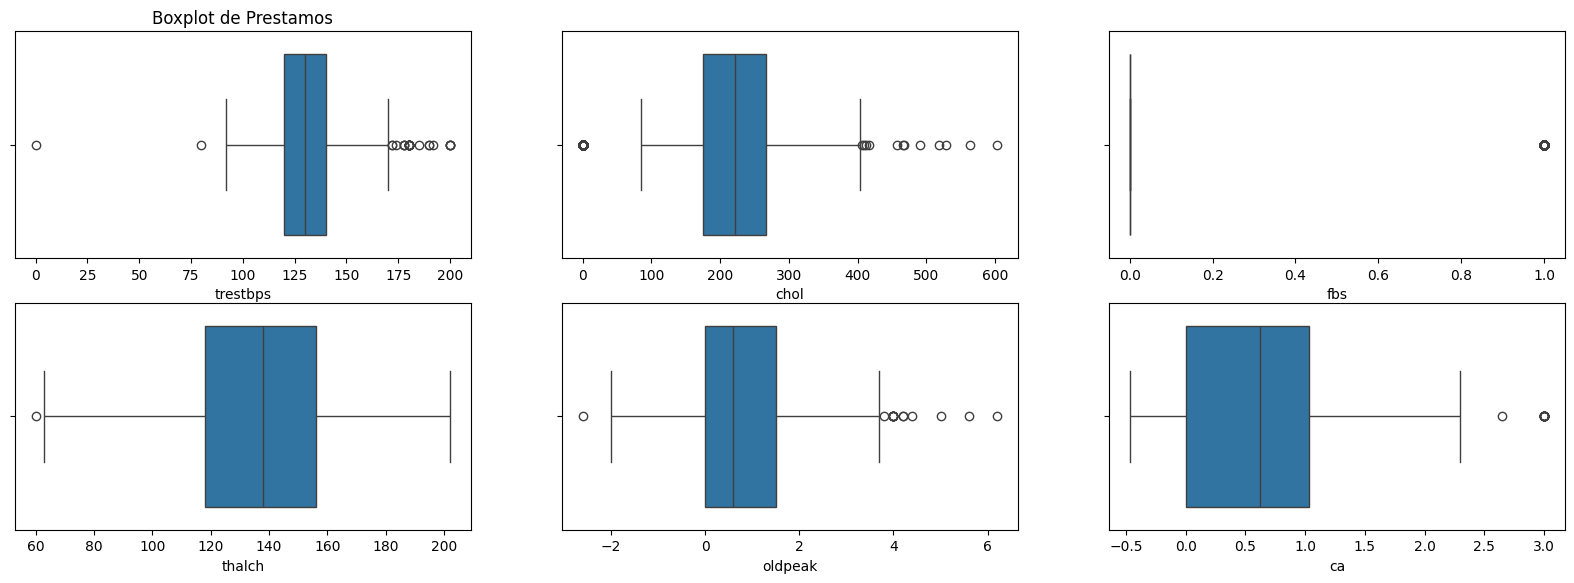

In [352]:
plt.figure(figsize=(20,10))

plt.subplot(3, 3, 1)
sns.boxplot(x=df_imputado['trestbps'])
plt.title('Boxplot de Prestamos')
plt.xlabel('trestbps')

plt.subplot(3,3,2)
sns.boxplot(x=df_imputado['chol'])
plt.xlabel('chol')

plt.subplot(3,3,3)
sns.boxplot(x=df_imputado['fbs'])
plt.xlabel('fbs')

plt.subplot(3,3,4)
sns.boxplot(x=df_imputado['thalch'])
plt.xlabel('thalch')

plt.subplot(3,3,5)
sns.boxplot(x=df_imputado['oldpeak'])
plt.xlabel('oldpeak')

plt.subplot(3,3,6)
sns.boxplot(x=df_imputado['ca'])
plt.xlabel('ca')

plt.show()

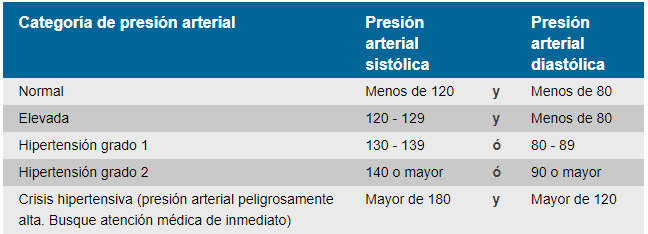

Recuperado de : https://medlineplus.gov/spanish/highbloodpressure.html

In [353]:
df_1 = df_imputado.query('trestbps != 0')
df_1 = df_imputado.query('chol != 0')

Eliminamos los outliers con presion arterial 0

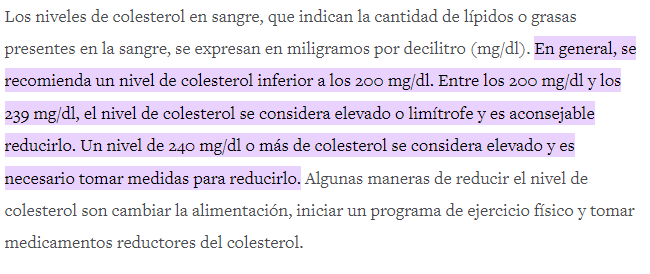

Recuperado de : https://www.texasheart.org/heart-health/heart-information-center/topics/colesterol/#:~:text=En%20general%2C%20se%20recomienda%20un,necesario%20tomar%20medidas%20para%20reducirlo.

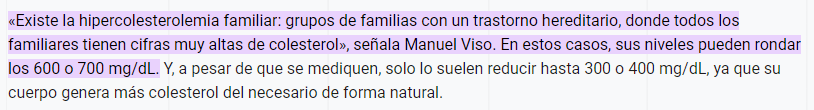

Recuperado de : https://imqsanrafael.es/por-que-sube-el-colesterol-si-no-como-grasas/#:~:text=%C2%ABExiste%20la%20hipercolesterolemia%20familiar%3A%20grupos,600%20o%20700%20mg%2FdL.

In [354]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,748.0,407.774064,266.774247,1.000000,187.7500,374.500000,561.25,920.0
age,748.0,52.883690,9.496063,28.000000,46.0000,54.000000,59.00,77.0
trestbps,748.0,133.031505,17.290076,92.000000,120.0000,130.000000,140.00,200.0
chol,748.0,244.506410,58.873517,85.000000,207.2061,236.909069,275.00,603.0
fbs,748.0,0.163102,0.369706,0.000000,0.0000,0.000000,0.00,1.0
thalch,748.0,139.703316,24.830733,69.000000,120.0000,140.000000,160.00,202.0
exang,748.0,0.347594,0.476525,0.000000,0.0000,0.000000,1.00,1.0
oldpeak,748.0,0.905749,1.071895,0.000000,0.0000,0.521441,1.50,6.2
ca,748.0,0.652086,0.746264,-0.467855,0.0000,0.474480,1.00,3.0
num,748.0,0.834225,1.102173,0.000000,0.0000,0.000000,1.00,4.0


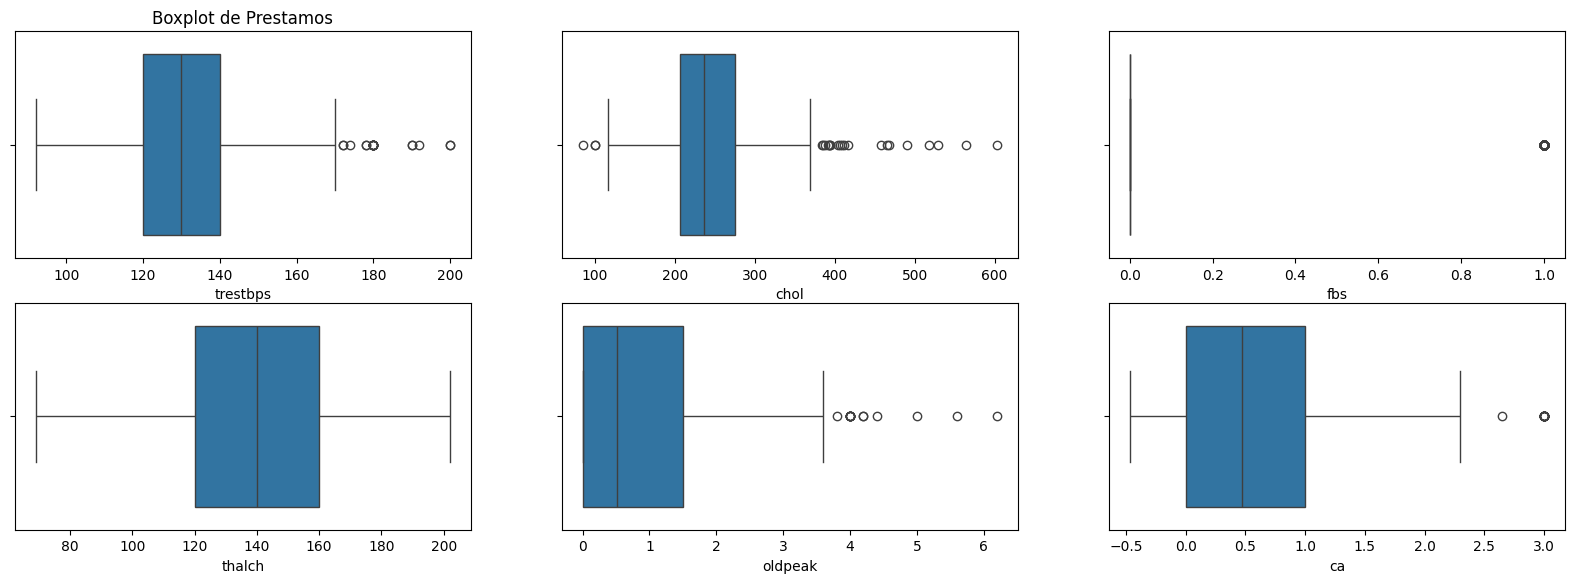

In [355]:
plt.figure(figsize=(20,10))

plt.subplot(3, 3, 1)
sns.boxplot(x=df_1['trestbps'])
plt.title('Boxplot de Prestamos')
plt.xlabel('trestbps')

plt.subplot(3,3,2)
sns.boxplot(x=df_1['chol'])
plt.xlabel('chol')

plt.subplot(3,3,3)
sns.boxplot(x=df_1['fbs'])
plt.xlabel('fbs')

plt.subplot(3,3,4)
sns.boxplot(x=df_1['thalch'])
plt.xlabel('thalch')

plt.subplot(3,3,5)
sns.boxplot(x=df_1['oldpeak'])
plt.xlabel('oldpeak')

plt.subplot(3,3,6)
sns.boxplot(x=df_1['ca'])
plt.xlabel('ca')

plt.show()

COMENTARIO OUTLIERS

Se eliminaron los valores de presion arterial 0, ya que no es posible esa medida en el ser humano, ademas se eliminaron los niveles de colesterol 0 ya que estos tampoco son reales.

Loa valores atipicos de colesterol muy altos no los eliminamos ya que hay casos con colesterol por  soble los 600.

Los otros valores atipicos de las otras columnas se dejaron ya que no encontre literatura que pudiera aclararme si esos valores eran errados o no lo eran.

In [356]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        748 non-null    float64
 1   age       748 non-null    float64
 2   sex       748 non-null    object 
 3   dataset   748 non-null    object 
 4   cp        748 non-null    object 
 5   trestbps  748 non-null    float64
 6   chol      748 non-null    float64
 7   fbs       748 non-null    int64  
 8   restecg   748 non-null    object 
 9   thalch    748 non-null    float64
 10  exang     748 non-null    int64  
 11  oldpeak   748 non-null    float64
 12  slope     748 non-null    object 
 13  ca        748 non-null    float64
 14  thal      748 non-null    object 
 15  num       748 non-null    float64
dtypes: float64(8), int64(2), object(6)
memory usage: 99.3+ KB


Realizaremos algunas agrupacion en base a la variable 'num' que es la variable objetiov segun el dataset de Kaggle.

Esta variable es una variable multiclase ya que sus valores son 0, 1, 2, 3, 4 que al parecer representa diferentes niveles de enfermedad cardíaca o quizás diferentes diagnósticos relacionados.

Interpretaciones posibles:

Niveles de severidad: Cada número podría representar un nivel de severidad de la enfermedad cardíaca, donde 0 indica ausencia de la enfermedad y valores más altos indican niveles de gravedad crecientes.

Diferentes diagnósticos: Los diferentes valores podrían corresponder a distintos diagnósticos relacionados con el corazón, no necesariamente todos clasificados como "enfermedad cardíaca".

Resultados de algún test: Podría ser un código numérico que representa los resultados de un test específico relacionado con la salud cardíaca.

In [357]:
# 1. Agrupación por sexo y presencia de enfermedad cardíaca y cálculo de conteos
grouped_data = df_1.groupby(['sex', 'num']).size().reset_index(name='count')
grouped_data



,sex,num,count
0,Female,0.0,143
1,Female,1.0,24
2,Female,2.0,7
3,Female,3.0,7
4,Female,4.0,2
5,Male,0.0,248
6,Male,1.0,179
7,Male,2.0,56
8,Male,3.0,62
9,Male,4.0,20


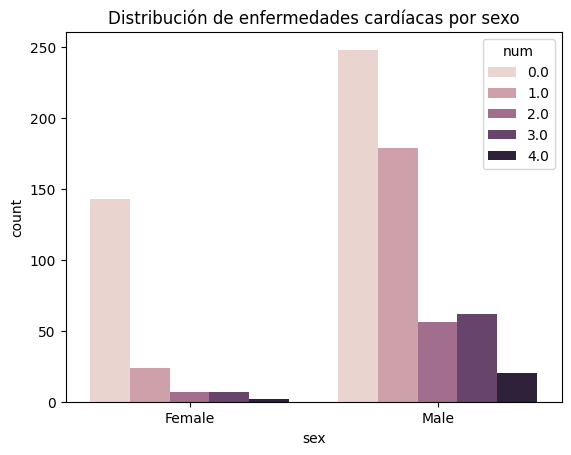

In [358]:
# Creación del gráfico de barras
sns.barplot(x='sex', y='count', hue='num', data=grouped_data)
plt.title('Distribución de enfermedades cardíacas por sexo')
plt.show()

COMENTARIO DEL GRAFICO

Este gráfico sugiere que existe una diferencia en la prevalencia y distribución de la enfermedad cardíaca entre hombres y mujeres en el conjunto de datos. Los hombres parecen tener una mayor incidencia de niveles más altos de enfermedad cardíaca en comparación con las mujeres.

In [359]:
# Agrupación por nivel de severidad y cálculo del promedio de edad
grouped_data = df_1.groupby('num')['age'].mean().reset_index()
grouped_data

,num,age
0,0.0,50.168798
1,1.0,52.871921
2,2.0,59.809524
3,3.0,59.391304
4,4.0,61.000000


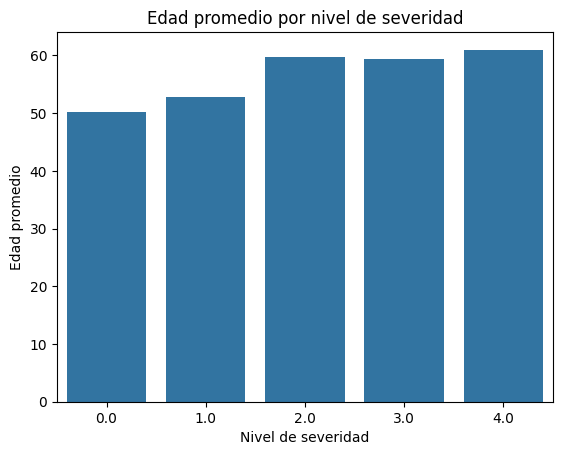

In [360]:
# Gráfico de barras
sns.barplot(x='num', y='age', data=grouped_data)
plt.title('Edad promedio por nivel de severidad')
plt.xlabel('Nivel de severidad')
plt.ylabel('Edad promedio')
plt.show()

COMENTARIO DEL GRAFICO

Este gráfico sugiere una fuerte asociación entre la edad y la severidad de la enfermedad cardíaca en el conjunto de datos. Los pacientes mayores tienden a tener niveles de severidad más altos

In [361]:
# Agrupación por nivel de severidad y cálculo de la edad promedio
grouped_data = df_1.groupby('num')[['age', 'trestbps', 'chol']].mean().reset_index()
grouped_data

,num,age,trestbps,chol
0,0.0,50.168798,130.152562,238.519906
1,1.0,52.871921,134.726092,254.031271
2,2.0,59.809524,136.584898,248.887995
3,3.0,59.391304,138.433776,247.486398
4,4.0,61.000000,141.442640,241.120836


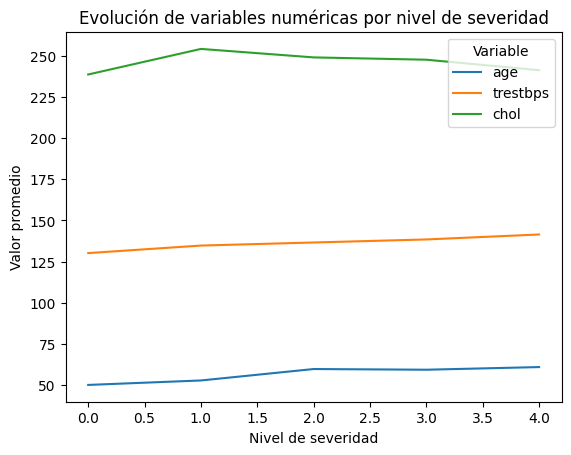

In [362]:
# Gráfico de líneas para visualizar la tendencia de las variables numéricas
sns.lineplot(x='num', y='value', hue='variable', data=pd.melt(grouped_data, id_vars=['num']))
plt.title('Evolución de variables numéricas por nivel de severidad')
plt.xlabel('Nivel de severidad')
plt.ylabel('Valor promedio')
plt.legend(title='Variable')
plt.show()

COMENTARIO DEL GRAFICO

La edad es un factor de riesgo importante: Los pacientes mayores tienden a tener niveles de severidad más altos.

La presión arterial podría ser un factor de riesgo asociado: Los niveles de presión arterial tienden a aumentar con la severidad de la enfermedad.

El colesterol no muestra una relación clara con la severidad: Al menos en este conjunto de datos, el colesterol no parece ser un factor determinante en la progresión de la enfermedad.

In [363]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        748 non-null    float64
 1   age       748 non-null    float64
 2   sex       748 non-null    object 
 3   dataset   748 non-null    object 
 4   cp        748 non-null    object 
 5   trestbps  748 non-null    float64
 6   chol      748 non-null    float64
 7   fbs       748 non-null    int64  
 8   restecg   748 non-null    object 
 9   thalch    748 non-null    float64
 10  exang     748 non-null    int64  
 11  oldpeak   748 non-null    float64
 12  slope     748 non-null    object 
 13  ca        748 non-null    float64
 14  thal      748 non-null    object 
 15  num       748 non-null    float64
dtypes: float64(8), int64(2), object(6)
memory usage: 99.3+ KB


In [364]:
correlation_matrix = df_imputado[["age","trestbps","chol","fbs","thalch","exang",
                                  "oldpeak","ca","num"]].corr(method='pearson')

print('\nCorrelación de Pearson: ')
print(correlation_matrix)


Correlación de Pearson: 
               age  trestbps      chol       fbs    thalch     exang  \
age       1.000000  0.255053 -0.091309  0.219915 -0.388086  0.160910   
trestbps  0.255053  1.000000  0.099903  0.161437 -0.116791  0.136465   
chol     -0.091309  0.099903  1.000000  0.086006  0.227202 -0.032483   
fbs       0.219915  0.161437  0.086006  1.000000 -0.064898 -0.003475   
thalch   -0.388086 -0.116791  0.227202 -0.064898  1.000000 -0.307872   
exang     0.160910  0.136465 -0.032483 -0.003475 -0.307872  1.000000   
oldpeak   0.263955  0.167478  0.051425  0.067552 -0.163636  0.368653   
ca        0.581698  0.104541 -0.133356  0.210364 -0.341484  0.231013   
num       0.339596  0.126096 -0.233097  0.129539 -0.372838  0.350567   

           oldpeak        ca       num  
age       0.263955  0.581698  0.339596  
trestbps  0.167478  0.104541  0.126096  
chol      0.051425 -0.133356 -0.233097  
fbs       0.067552  0.210364  0.129539  
thalch   -0.163636 -0.341484 -0.372838  
exang  

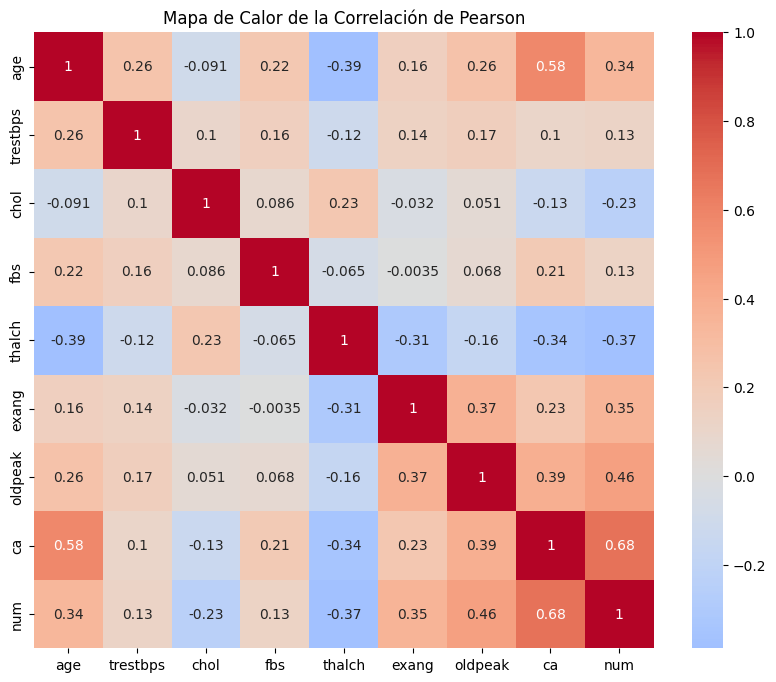

In [365]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

COMENTARIO DEL MAPA DE CALOR

Correlación positiva fuerte:

ca (número de vasos sanguíneos principales con enfermedad) y num (nivel de severidad de la enfermedad): Existe una fuerte correlación positiva entre estas dos variables, lo que indica que a medida que aumenta el número de vasos sanguíneos con enfermedad, también aumenta el nivel de severidad de la enfermedad cardíaca.

oldpeak (depresión ST inducida por el ejercicio en relación con el reposo) y num: Existe una correlación positiva moderada entre estas dos variables, lo que sugiere que a medida que aumenta la depresión del segmento ST, también aumenta el nivel de severidad de la enfermedad.

Correlación negativa:

thalch (frecuencia cardíaca máxima alcanzada) y age: Existe una correlación negativa moderada entre estas dos variables, lo que indica que a medida que aumenta la edad, tiende a disminuir la frecuencia cardíaca máxima.

# PREPROCESAMIENTO

In [366]:
df_1.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0.0


In [367]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        748 non-null    float64
 1   age       748 non-null    float64
 2   sex       748 non-null    object 
 3   dataset   748 non-null    object 
 4   cp        748 non-null    object 
 5   trestbps  748 non-null    float64
 6   chol      748 non-null    float64
 7   fbs       748 non-null    int64  
 8   restecg   748 non-null    object 
 9   thalch    748 non-null    float64
 10  exang     748 non-null    int64  
 11  oldpeak   748 non-null    float64
 12  slope     748 non-null    object 
 13  ca        748 non-null    float64
 14  thal      748 non-null    object 
 15  num       748 non-null    float64
dtypes: float64(8), int64(2), object(6)
memory usage: 99.3+ KB


In [368]:
df_1 = df_1.reset_index(drop=True)

In [369]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        748 non-null    float64
 1   age       748 non-null    float64
 2   sex       748 non-null    object 
 3   dataset   748 non-null    object 
 4   cp        748 non-null    object 
 5   trestbps  748 non-null    float64
 6   chol      748 non-null    float64
 7   fbs       748 non-null    int64  
 8   restecg   748 non-null    object 
 9   thalch    748 non-null    float64
 10  exang     748 non-null    int64  
 11  oldpeak   748 non-null    float64
 12  slope     748 non-null    object 
 13  ca        748 non-null    float64
 14  thal      748 non-null    object 
 15  num       748 non-null    float64
dtypes: float64(8), int64(2), object(6)
memory usage: 93.6+ KB


In [370]:
columna_a_eliminar = ["id","dataset"]
df_1 = df_1.drop(columna_a_eliminar, axis=1)

In [371]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       748 non-null    float64
 1   sex       748 non-null    object 
 2   cp        748 non-null    object 
 3   trestbps  748 non-null    float64
 4   chol      748 non-null    float64
 5   fbs       748 non-null    int64  
 6   restecg   748 non-null    object 
 7   thalch    748 non-null    float64
 8   exang     748 non-null    int64  
 9   oldpeak   748 non-null    float64
 10  slope     748 non-null    object 
 11  ca        748 non-null    float64
 12  thal      748 non-null    object 
 13  num       748 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 81.9+ KB


In [372]:
!pip install dask[dataframe]

In [373]:
!pip install xgboost

In [374]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [375]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [376]:
y = df_imputado['num']
X = df_imputado.drop(['num','id','dataset'], axis = 1)

In [377]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63.0,Male,typical angina,145.000000,233.0,1,lv hypertrophy,150.000000,0,2.300000,downsloping,0.000000,fixed defect
1,67.0,Male,asymptomatic,160.000000,286.0,0,lv hypertrophy,108.000000,1,1.500000,flat,3.000000,normal
2,67.0,Male,asymptomatic,120.000000,229.0,0,lv hypertrophy,129.000000,1,2.600000,flat,2.000000,reversable defect
3,37.0,Male,non-anginal,130.000000,250.0,0,normal,187.000000,0,3.500000,downsloping,0.000000,normal
4,41.0,Female,atypical angina,130.000000,204.0,0,lv hypertrophy,172.000000,0,1.400000,upsloping,0.000000,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,Female,asymptomatic,127.000000,333.0,1,st-t abnormality,154.000000,0,0.000000,flat,0.988755,normal
916,62.0,Male,typical angina,136.556831,139.0,0,st-t abnormality,117.195494,0,0.459087,flat,0.754967,normal
917,55.0,Male,asymptomatic,122.000000,223.0,1,st-t abnormality,100.000000,0,0.000000,flat,1.212196,fixed defect
918,58.0,Male,asymptomatic,141.063635,385.0,1,lv hypertrophy,121.002264,0,0.767936,flat,0.744965,normal


In [378]:
y

,num
0,0.0
1,2.0
2,1.0
3,0.0
4,0.0
...,...
915,1.0
916,0.0
917,2.0
918,0.0


In [379]:
label = LabelEncoder()
y = label.fit_transform(y)

In [380]:
# Verificar los valores únicos en y (varible objetivo)
valores_unicos = np.unique(y)
print(valores_unicos)

[0 1 2 3 4]


In [381]:
# Dividimos los datos en conjunto de entrenamiemto y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [382]:
# Columnas numéricas
variables_num = X_train.select_dtypes(include=['float64','int64']).columns.tolist()


# Transformer para las columnas numéricas
num_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]
)


# Columnas categóricas
variables_cat = ["sex","cp","restecg","slope","thal"]

cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación
        ("onehot", OneHotEncoder(handle_unknown="ignore"))  # Codificación categórica
    ]
)

# Se incluye un ColumnTransformer para agrupar todas las transformaciones realizadas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, variables_num),           # Transformaciones numéricas
        ("cat", cat_transformer, variables_cat),           # Transformaciones categóricas

    ],
    remainder="passthrough",  # Dejar columnas que no se transforman como están
    n_jobs=-1,                # Usar todos los núcleos disponibles
    verbose=True,             # Mostrar información sobre el procesamiento
    sparse_threshold=0.3      # Determina el umbral para matrices dispersas
)

In [384]:
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

pipe_xgb = Pipeline(steps=[("pp", preprocessor),
                            ("model", model_xgb)])

In [385]:
# Entrenar el modelo

pipe_xgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:58:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('pp',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'fbs', 'thalch', 'exang',
                                                   'oldpeak', 'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='i...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [386]:
# Realizar predicciones en el conjunto de prueba
y_pred_xgb = pipe_xgb.predict(X_test)
y_prob_xgb = pipe_xgb.predict_proba(X_test)[:, 1]

# MODELO

Exactitud: 0.7065217391304348
Reporte de Clasificacion por lgbm
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       120
           1       0.65      0.64      0.65        78
           2       0.65      0.38      0.48        34
           3       0.55      0.67      0.60        36
           4       0.00      0.00      0.00         8

    accuracy                           0.71       276
   macro avg       0.53      0.52      0.52       276
weighted avg       0.69      0.71      0.69       276



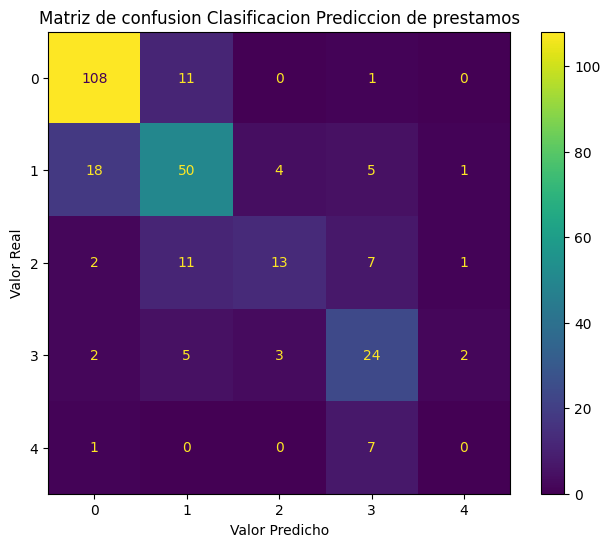

In [387]:
score_xgb = pipe_xgb.score(X_test, y_test)
print(f'Exactitud: {score_xgb}')
y_prob_xgb = pipe_xgb.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred_xgb)


cm=confusion_matrix(y_test,y_pred_xgb)
print("Reporte de Clasificacion por lgbm")
print(classification_report(y_test,y_pred_xgb))
cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Clasificacion Prediccion de Enfermedades Cardiacas')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

COMENTARIO

Exactitud:

0.7065: Esto significa que EL modelo predice correctamente el nivel de severidad de la enfermedad cardíaca en aproximadamente el 70.65% de los casos.

Reporte de Clasificación:

Precision: Mide la proporción de predicciones positivas (es decir, que la persona tiene un cierto nivel de severidad) que son realmente correctas. Por ejemplo, una precisión de 0.82 para la clase 0 significa que el 82% de las veces que el modelo predice que una persona tiene un nivel de severidad 0, esto es correcto.

Recall: Mide la proporción de casos positivos reales que el modelo identifica correctamente. Por ejemplo, un recall de 0.90 para la clase 0 significa que el modelo identifica correctamente el 90% de las personas que realmente tienen un nivel de severidad 0.

Clases 0, 1, 2 y 3: El modelo tiene un rendimiento bastante bueno en estas clases, con valores de precisión, recall y F1-score razonables.

Clase 4: El modelo tiene dificultades para clasificar correctamente los casos de la clase 4. Esto podría deberse a varias razones, como una falta de datos de entrenamiento para esta clase o una complejidad inherente en la clasificación de estos casos.

MATRIZ DE CONFUSION

Análisis por clase:

Clase 0: El modelo tiene una alta precisión en la clasificación de esta clase.

Clase 1: El modelo también tiene un buen desempeño en esta clase, aunque con un número menor de observaciones correctas.

Clases 2, 3 y 4: El modelo tiene dificultades para clasificar correctamente las observaciones de estas clases, especialmente la clase 4. Esto podría deberse a varias razones, como una menor cantidad de datos de entrenamiento para estas clases o una mayor complejidad en la separación de estas clases

In [389]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

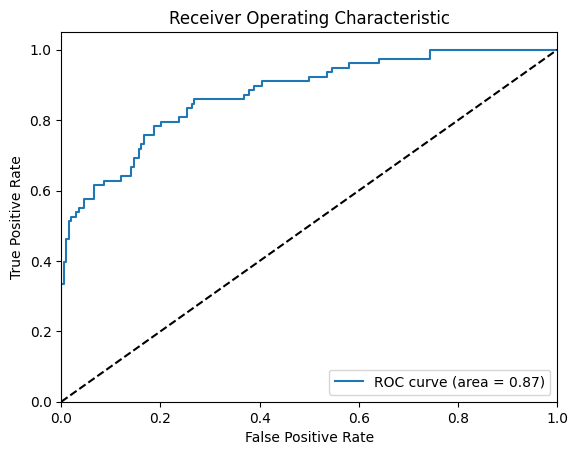

In [391]:
y_test_binary = (y_test == 1).astype(int)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_xgb)
auc = roc_auc_score(y_test_binary, y_prob_xgb)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Paso 4: Optimización con GridSearchCV

In [400]:
from sklearn.model_selection import GridSearchCV

In [401]:
X_train = pd.get_dummies(X_train)
model_xgb = xgb.XGBClassifier()

In [402]:
# Definir el espacio de hiperparámetros
param_grid = {
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__n_estimators': [100, 200, 300],
    'model__subsample': [0.7, 0.8, 0.9]
}

In [403]:
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:15:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "model__learning_rate", "model__max_depth", "model__n_estimators", "model__subsample" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200, 300],
                         'model__subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy')

In [404]:
# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.7}


In [405]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Exactitud del mejor modelo: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred_xgb))

Exactitud del mejor modelo: 0.7065217391304348
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       120
           1       0.65      0.64      0.65        78
           2       0.65      0.38      0.48        34
           3       0.55      0.67      0.60        36
           4       0.00      0.00      0.00         8

    accuracy                           0.71       276
   macro avg       0.53      0.52      0.52       276
weighted avg       0.69      0.71      0.69       276



Matriz de Confusión:
[[108  11   0   1   0]
 [ 18  50   4   5   1]
 [  2  11  13   7   1]
 [  2   5   3  24   2]
 [  1   0   0   7   0]]


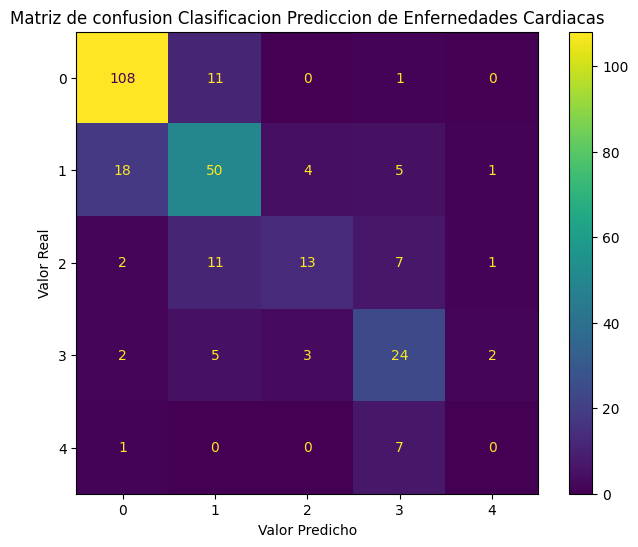

In [407]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print('Matriz de Confusión:')
print(conf_matrix)
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Clasificacion Prediccion de Enfernedades Cardiacas')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

COMENTARIO

Al comparar estos resultados con los anteriores, podemos observar algunas diferencias y sacar conclusiones interesantes:

Exactitud similar: La exactitud general del modelo se mantuvo bastante similar después de la optimización. Esto indica que GridSearchCV no encontró una combinación de hiperparámetros que mejorara significativamente el rendimiento general del modelo en este caso particular.

Mejoras en algunas clases: Si bien la exactitud general no cambió mucho, es posible que haya habido mejoras en la precisión o el recall de algunas clases específicas.

Mismas dificultades en clases minoritarias: La clase 4 sigue siendo la que presenta mayores dificultades para el modelo. Esto sugiere que podrían ser necesarios ajustes adicionales o la incorporación de nuevas características para mejorar la clasificación de esta clase.

Análisis de la Matriz de Confusión:

Confirmación de tendencias: La matriz de confusión confirma las tendencias observadas anteriormente. El modelo sigue teniendo un buen desempeño en la clasificación de la clase 0 y dificultades con la clase 4.

Posibles explicaciones para la clase 4:

Desbalance de clases: Si la clase 4 representa una proporción muy pequeña de los datos, el modelo puede tener dificultades para aprender a clasificarla correctamente.

Complejidad de la clase: Es posible que la clase 4 sea intrínsecamente más difícil de clasificar debido a que sus características son más similares a las de otras clases.

Falta de características relevantes: Puede que falten características importantes para distinguir correctamente los casos de la clase 4.